The Scenario:You are an analyst for an IPL franchise. You are evaluating a potential opener, "Player X."We assume that every ball a batsman faces is a "Bernoulli trial": they either survive (Probability $1-p$) or they get out (Probability $p$).Therefore, the number of balls they survive until they get out ($X$) should theoretically follow a Geometric Distribution.



1.What is the Maximum Likelihood Estimate (MLE) for $p$ (the probability of this player getting out on any single delivery)?


2.Based on this $p$, what is their Expected average balls faced per innings ($1/p$)?


3.Visualization: Plot the "Actual Frequency" of balls faced vs. the "Theoretical Geometric Probability" to see if this player is "consistent" or "unpredictable."

## Data

Balls faced in last 50 innings where they were dismissed

In [1]:
balls_faced = [
    2, 45, 12, 6, 88, 14, 3, 1, 56, 23, 
    5, 10, 72, 4, 18, 29, 7, 9, 33, 15,
    64, 11, 2, 41, 8, 22, 1, 35, 95, 13,
    6, 25, 4, 60, 19, 3, 44, 12, 7, 30,
    16, 2, 8, 51, 20, 14, 5, 28, 9, 38
]

## Solution

In [5]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

In [6]:
sample = np.array(balls_faced)

In [7]:
print(sample)

[ 2 45 12  6 88 14  3  1 56 23  5 10 72  4 18 29  7  9 33 15 64 11  2 41
  8 22  1 35 95 13  6 25  4 60 19  3 44 12  7 30 16  2  8 51 20 14  5 28
  9 38]


In [8]:
n = len(sample)

In [9]:
print(n)

50


As we know that the number of balls faced before dismissal can be modeled as number of failures before first success, we can model it as Geometric($p$), where $p$ is the probability of success, i.e. probability of the batter getting out on a given ball. 

We will use "maximum likelyhood" to estimate $p$.

In [10]:
# finding likelyhood
sum_of_sample = np.sum(sample)
print(sum_of_sample)

1145


Likelyhood = $ p^{n}(1-p)^{sum of sample - n} $

$ log(L) = n log(p) + (sum of sample -n) log(1-p) $

To find the maximum likelyhood, we will differentiate $ log(L)$ w.r.t $ p $ and equate to 0 

$ (n/p) - (sum of samples - n )/(1-p) = 0 $

Putting the values of $ n, sum of samples $, 

$ (50 / p) - (1145-50)/(1-p) = 0 $ 

$ p^h = 50 / 1145 = 0.04366$


On a given ball, there is $ 4.366 $% chance of this batter getting out. 

In [11]:
p = 0.04366

In [12]:
expected_value = 1/p 
print(expected_value)

22.904260192395785


On an average, this batter plays $23$ deliveries before getting dismissed.

## Visualization

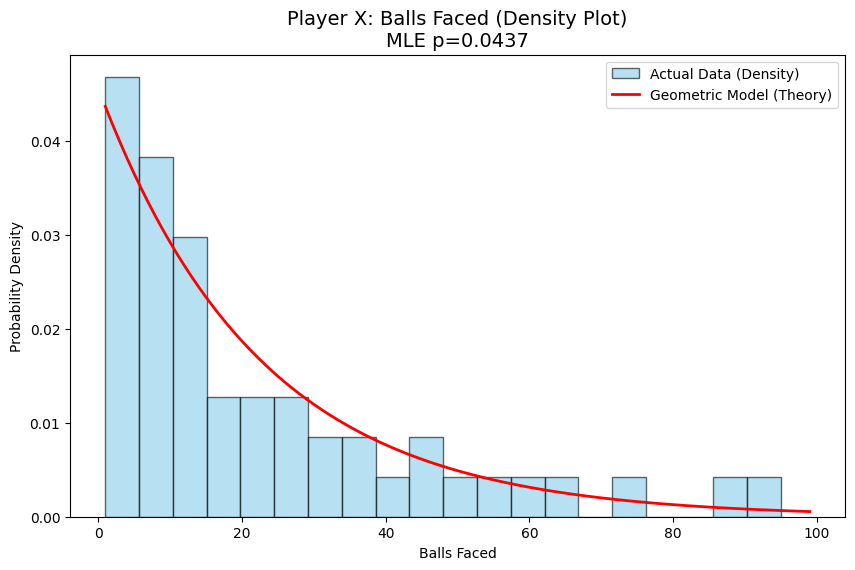

In [20]:
plt.figure(figsize=(10, 6))
plt.hist(sample, bins=20, density=True, color='skyblue', edgecolor='black', alpha=0.6, label='Actual Data (Density)')


x_values = np.arange(1, 100)
theoretical_probs = [(1 - p)**(k - 1) * p for k in x_values]

plt.plot(x_values, theoretical_probs, color='red', linewidth=2, label='Geometric Model (Theory)')

plt.title(f'Player X: Balls Faced (Density Plot)\nMLE p={p:.4f}', fontsize=14)
plt.xlabel('Balls Faced')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

### This is a good fit. Batter is consistent.